# Ejercicio 6

In [2]:
using Plots
using LightGraphs
using Random
using Colors

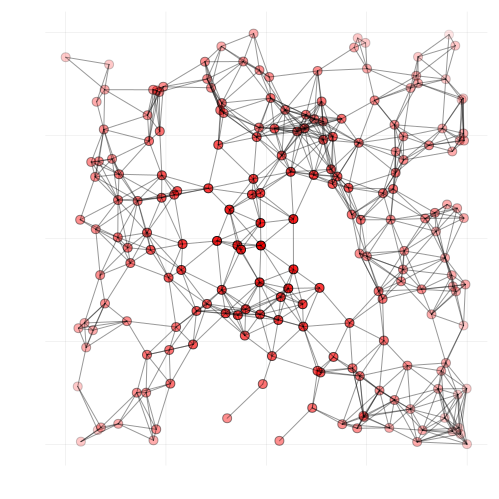

In [11]:
n = 200
r = 0.125
G = SimpleGraph(n)
positions = Dict(i => (rand(), rand()) for i in 1:n)

for i in 1:n
    for j in i+1:n
        if sqrt((positions[i][1] - positions[j][1])^2 + (positions[i][2] - positions[j][2])^2) < r
            add_edge!(G, i, j)
        end
    end
end

dmin = 1.0
ncenter = 1
for (n, (x, y)) in positions
    d = (x - 0.5)^2 + (y - 0.5)^2
    if d < dmin
        ncenter = n
        dmin = d
    end
end

p = dijkstra_shortest_paths(G, ncenter).dists
if maximum(p) == minimum(p)
    p_norm = [0.5 for i in 1:n]
else
    p_max = maximum(p)
    p_min = minimum(p)
    p_norm = [1 - (p[i] - p_min) / (p_max - p_min) for i in 1:n]
    p_norm = [0.1 + 0.9 * p_norm[i] for i in 1:n]
end

scatter([positions[i][1] for i in 1:n], [positions[i][2] for i in 1:n], 
        markersize=5, 
        c=[RGBA(1.0, 0.0, 0.0, p_norm[i]) for i in 1:n],
        alpha=[RGBA(1.0, 0.0, 0.0, p_norm[i]) for i in 1:n],
        legend=false, size=(500,500))

for e in edges(G)
    plot!([positions[src(e)][1], positions[dst(e)][1]], 
          [positions[src(e)][2], positions[dst(e)][2]], 
          linecolor=:black, linealpha=0.4, legend=false)
end

xlims!(-0.05, 1.05)
ylims!(-0.05, 1.05)
plot!(legend=false, axis=false)